# Libraries Used

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from keras.optimizers import Adam
from keras.layers import *
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping


from sklearn.utils import shuffle

import cv2


from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input,decode_predictions


Using TensorFlow backend.


In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [3]:
icml_face_data = pd.read_csv("Data/icml_face_data.csv")

In [4]:
train

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [5]:
test

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...
7173,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
7174,178 174 172 173 181 188 191 194 196 199 200 20...
7175,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
7176,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [6]:
icml_face_data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [7]:
icml_face_data[" Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name:  Usage, dtype: int64

In [8]:
train_extra = icml_face_data[icml_face_data[" Usage"]=="Training"]
test_extra = icml_face_data[icml_face_data[' Usage']=='PublicTest']

In [9]:
train_extra

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
28704,2,Training,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,Training,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,Training,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,Training,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [10]:
y_train_extra = train_extra["emotion"]
x_train_extra = train_extra[" pixels"]
y_test = test_extra["emotion"]


In [11]:
x_test = test_extra[" pixels"]

In [12]:
x_train_extra.shape,y_train_extra.shape,x_test.shape,y_test.shape

((28709,), (28709,), (3589,), (3589,))

In [13]:
y_train_extra

0        0
1        0
2        2
3        4
4        6
        ..
28704    2
28705    0
28706    4
28707    0
28708    4
Name: emotion, Length: 28709, dtype: int64

In [14]:
train.isnull().sum()

emotion    0
pixels     0
dtype: int64

# Emotion Graph

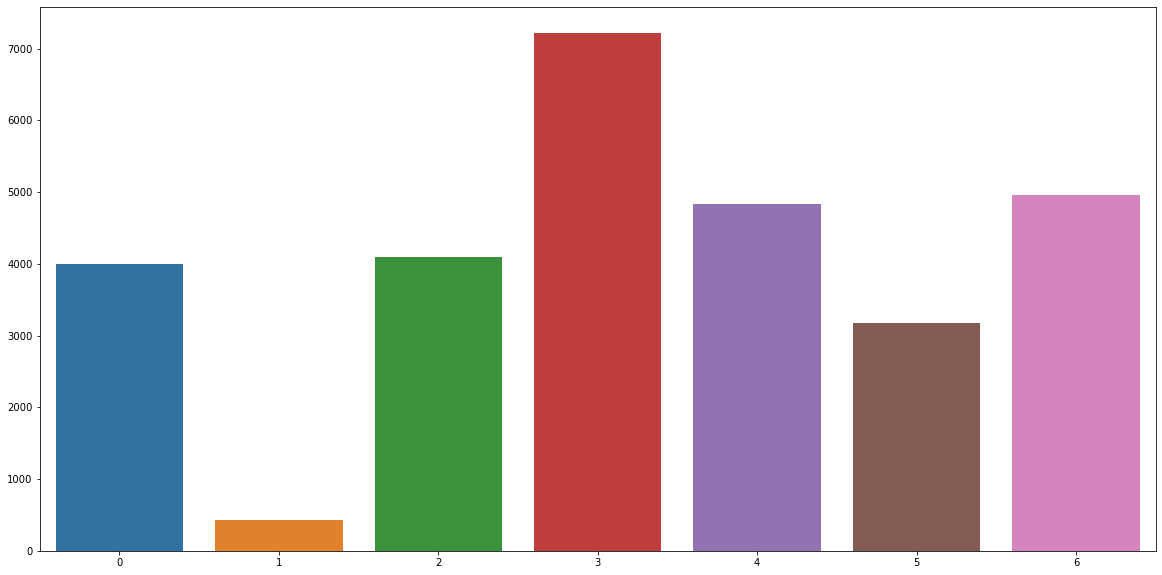

In [14]:
Each_Emotion_Counts = train["emotion"].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(Each_Emotion_Counts.index,Each_Emotion_Counts.values)
plt.show()

In [15]:
Number_to_emotion = {0 :'Angry 😡', 1 : 'Disgust 🤢', 2:'Fear 😰', 3 :'Happy 🤣', 4:'Sad 😭', 5:'Surprise 😱', 6:'Neutral 🙂'}

In [16]:
x_train_extra

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
28704    84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705    114 112 113 113 111 111 112 113 115 113 114 11...
28706    74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707    222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28708    195 199 205 206 205 203 206 209 208 210 212 21...
Name:  pixels, Length: 28709, dtype: object

In [17]:
x_test.shape

(3589,)

In [18]:
x_train = train["pixels"].apply(lambda x: np.array(x.split(),dtype="float32"))
# x_train_extra = x_train_extra["pixels"].apply(lambda x: np.arraay(x.split(),dtype="float32"))

x_test = x_test.apply(lambda x: np.array(x.split(),dtype="float32"))


In [19]:
x_train

0        [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....
1        [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...
2        [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...
3        [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....
4        [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
28704    [84.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85....
28705    [114.0, 112.0, 113.0, 113.0, 111.0, 111.0, 112...
28706    [74.0, 81.0, 87.0, 89.0, 95.0, 100.0, 98.0, 93...
28707    [222.0, 227.0, 203.0, 90.0, 86.0, 90.0, 84.0, ...
28708    [195.0, 199.0, 205.0, 206.0, 205.0, 203.0, 206...
Name: pixels, Length: 28709, dtype: object

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(train["emotion"])
y_test = np.array(y_test)

In [22]:
X_train = []
for i in range(x_train.shape[0]):
    X_train.append(x_train[i].reshape(48,48,1))
x_train = np.array(X_train)


X_test= []
for j in range(x_test.shape[0]):
    X_test.append(x_test[j].reshape(48,48,1))
x_test = np.array(X_test)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1), (28709,), (3589,))


# Visualising Images

In [24]:
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

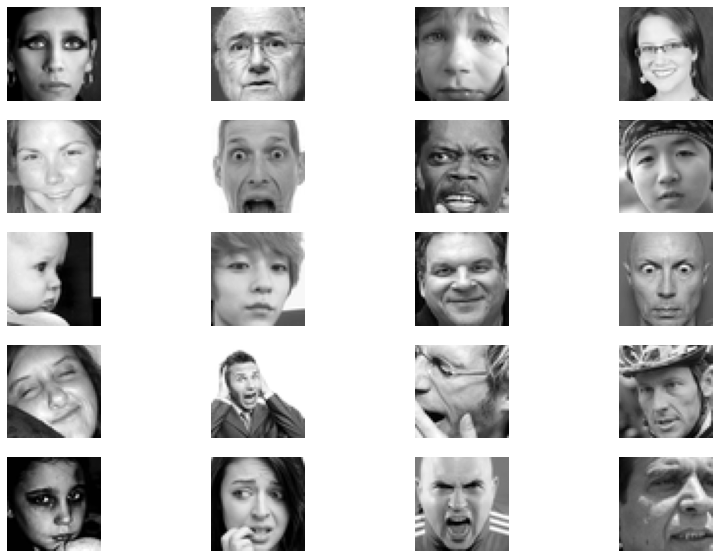

In [25]:
w = 10
h = 10
fig = plt.figure(figsize=(14,10))
columns = 4
rows = 5
for i in range(1,columns*rows+1):
    img = x_train[i+3].reshape(48,48)
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
    plt.axis("off")
plt.show()

# To Categorical

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(28709, 48, 48, 1) (28709, 7)
(3589, 48, 48, 1) (3589, 7)


# Own Model Building

In [27]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(48,48,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(7,activation="softmax"))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)      

In [29]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
checkpoint = ModelCheckpoint("./best_model.h5",monitor="val_accuracy",mode="auto",save_best_only=True,verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,restore_best_weights=True)
callback = [checkpoint,earlystop]

In [32]:
model_hist = model.fit(x_train,y_train,batch_size=256,epochs=20,validation_split=0.05,shuffle=True,callbacks=callback)

Train on 27273 samples, validate on 1436 samples
Epoch 1/20
27273/27273 [==============================] - 321s 12ms/step - loss: 1.7182 - accuracy: 0.3031 - val_loss: 1.5754 - val_accuracy: 0.3642

Epoch 00001: val_accuracy improved from 0.25165 to 0.36421, saving model to ./best_model.h5
Epoch 2/20
27273/27273 [==============================] - 322s 12ms/step - loss: 1.5173 - accuracy: 0.4079 - val_loss: 1.4320 - val_accuracy: 0.4262

Epoch 00002: val_accuracy improved from 0.36421 to 0.42618, saving model to ./best_model.h5
Epoch 3/20
27273/27273 [==============================] - 323s 12ms/step - loss: 1.3740 - accuracy: 0.4698 - val_loss: 1.2828 - val_accuracy: 0.5084

Epoch 00003: val_accuracy improved from 0.42618 to 0.50836, saving model to ./best_model.h5
Epoch 4/20
27273/27273 [==============================] - 326s 12ms/step - loss: 1.2994 - accuracy: 0.5010 - val_loss: 1.2342 - val_accuracy: 0.5286

Epoch 00004: val_accuracy improved from 0.50836 to 0.52855, saving model to

# Accuracy & Loss Plot

1) Accuracy

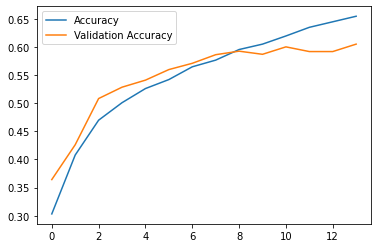

In [33]:
plt.plot(model_hist.history['accuracy'],label="Accuracy")
plt.plot(model_hist.history['val_accuracy'],label="Validation Accuracy")
plt.legend()

2) Loss

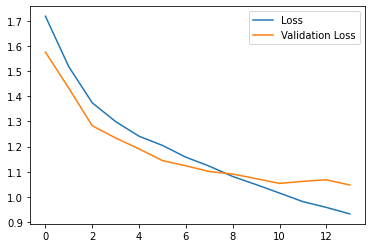

In [34]:
plt.plot(model_hist.history['loss'],label="Loss")
plt.plot(model_hist.history['val_loss'],label="Validation Loss")
plt.legend()

In [35]:
model.evaluate(x_train,y_train)

28709/28709 [==============================] - 87s 3ms/step


[0.886953325650133, 0.6742833256721497]

In [36]:
model.evaluate(x_test,y_test)

3589/3589 [==============================] - 11s 3ms/step


[1.0932078417644888, 0.5837280750274658]

In [39]:
preds = model.predict_classes(x_test)

In [40]:
preds

array([6, 4, 0, ..., 3, 0, 6], dtype=int64)

Predicted Emotion Happy


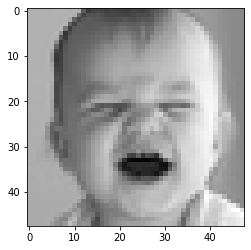

In [41]:
print("Predicted Emotion",Number_to_emotion[preds[234]])
plt.imshow(x_test[234].reshape(48,48))
plt.show()

In [42]:
model = load_model("best_model.h5")

# Testing On Web Cam

In [1]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

while True:
    res,frame = cap.read()
    
    if res==False:
        continue
    
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(frame,1.2,5)
    
    if len(faces)==0:
        for (x,y,w,h) in faces:
            cv2.putText(frame,"Processing",(x,y-10),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2,cv2.LINE_AA)
            
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    for face in faces:
        x,y,w,h = face
        
        offset = 10
        face_section = gray_frame[y-offset:y+h+offset,x-offset:x+w+offset]
        
        if (np.all(np.array(face_section.shape))):
            face_section = cv2.resize(face_section,(48,48))
            
            pred = np.argmax(model.predict(face_section.reshape(1,48,48,1)))
            label = Number_to_emotion[pred]
            
            cv2.putText(frame, label, (x,y-10), cv2.FONT_HERSHEY_COMPLEX,1,(255,30,0),2,cv2.LINE_AA)
            cv2.rectangle(frame,(x,y),(x+w,y+h), (0,255,255),2)
            
    cv2.imshow("Emotion",frame)
    
    key_pressed = cv2.waitKey(1)
    
    if key_pressed == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

In [2]:
Number_to_emotion = {0 :'Angry', 1 : 'Disgust', 2:'Fear', 3 :'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

# Angry

In [18]:
Angry = ["Basket Case","Don't Look Back in Anger","Look Back in Anger",
           "Misery Business","Death on Two Legs","Since U Been Gone","St. Anger","Break Stuff","I Don't Care Anymore"
           ,"I Hate Everything About You","Platypus (I Hate You)","Having a Blast","Faint","One Step Closer"
           ,"Killing in the Name","Angry Chair","We're Not Gonna Take It","Gives You Hell","The Resistance","Prison Song"
           ,"Bad Habit","It's not me It's you","Better Than Revenge","Angry Again","Kill You"]

In [19]:
len(Angry)

25

# Disgust

In [22]:
Disgust = ["First Day Of School","I'm Not The Only One","Problem","Before He Cheats","Jar Of Hearts",
          "Pumped Up Kicks","Jealous","Keeps Gettin' Better","SuperGirl","Since U Been Gone","That's What You Get",
          "Call Me When You're Sober","Honey", "This Mirror Isn't Big Enough for the Two of Us","Reject","Unhappy Birthday-2011 Remaster"
          "yes girl","Cold Shoulder","Boneyards","Pretty On The Outside","Still Don't Seem To Care","I Hate Everything About You",
          "Throw Yourself Away","Jealous(I Ain't With It)","Really Don't Care","No Scrubs"]

In [23]:
len(Disgust)

25

# Fear

In [26]:
Fear = ["In My Blood","Breathin","Sober","Save Myself","Perfect","Waving Through a Window","Save My Soul","Fake Happy"
       ,"Head Above Water","Heavy","Fix You","The Village","Human","Who You Are","Diana","Praying","Let Your Tears Fall",
       "Breathe Me","Smoke & Mirrors","Hard Times","The Doctor Said","Skyscraper","The Lonely","How to Save a Life","Nobody's Home"]

In [27]:
len(Fear)

25

# Happy

In [32]:
Happy = ["Let’s Go Crazy","Walking on Sunshine","Tightrope","Three Little Birds","Lovely Day","I Got You (I Feel Good)"
        ,"Valerie","Dancing Queen","Uptown Funk","Can’t Stop the Feeling","Good as Hell","Don’t Bring Me Down",
        "One More Time","It’s a Beautiful Morning","You Make My Dreams","Roobaroo","Ilahi","Rock On!","Yun Hi Chala Chal Rahi"
        ,"Badtameez Dil","Tum Hi Ho Bandhu","Balam Pichkari","Mein Koi Aisa Geet Gaoon","Chala Jata Hoon","Dil Dhadakne Do"]

In [33]:
len(Happy)

25

# Sad

In [34]:
Sad = ['When We Were Young','Beyond',"I'm On Fire",'Somebody Else','Homesick','How Will I Know','From the Dining Table',
      "Nothing's Gonna Hurt You Baby",'ILYSB','Right Now','Wonderful Tonight',"River","Dancing on My Own","Slow Burn"
      ,"Be Alright","Kabira","Agar Tum Saath Ho","Mana Ke Hum Yaar Nahi","Channa Mereya","Phir Le Aaya Dil","Main Rahoon Ya Na Rahoon"
      ,"Humdard","Bulleya","Tujhe Bhula Diya","Yeh Dooriyan"]

In [35]:
len(Sad)

25

# Surprise

In [40]:
Surprise = ["My Way","With a Little Help From My Friends","Doesn’t Make It Alright","Jealous Guy","Money (That’s What I Want)",
           "The Sound of Silence","Comfortably Numb","Hurt","A Hard Rains a-Gonna Fall","Satisfaction","Georgia On My Mind"
           ,"House of the Rising Sun","Light My Fire","War","My Sweet Lord","Family Affair","Theme from Shaft","When Doves Cry"
           ,"Money For Nothing","A Whole New World","Candle in the Wind","Mo Money Mo Problems","Fallin’","Slow Jamz","Rolling in the Deep"]

In [41]:
len(Surprise)

25

# Neutral

In [46]:
Neutral = ["See You Again","Sorry","Uptown Funk","Blank Space","Shake It Off","Despacito","Lean On","Hello","Roar",
          "Sugar","All About That Bass","Baby","Love Me Like You Do","Waka Waka","Summer Of 69","Lakshya","Kandhon Se Milte Hain Kandhe"
          ,"BESABRIYAAN","Aaj Kal Zindagi","Kun Faya Kun","Salaam India","Chak De India","Badal Pe Paon Hain","All Izz Well","Chak Lein De"]

In [ ]:
Number_to_emotion = {0 :'Angry 😡', 1 : 'Disgust 🤢', 2:'Fear 😰', 3 :'Happy 🤣', 4:'Sad 😭', 5:'Surprise 😱', 6:'Neutral 🙂'}

In [47]:
len(Neutral)

25

In [48]:
Emotion_Based_Songs = {"Angry 😡":Angry,"Disgust 🤢":Disgust,"Fear 😰":Fear,"Happy 🤣":Happy,"Sad 😭":Sad,"Surprise 😱":Surprise,"Neutral 🙂":Neutral}

In [55]:
len(Emotion_Based_Songs)

7

In [78]:
SongList = Emotion_Based_Songs["Angry 😡"]

In [81]:
print(np.random.choice(SongList,1, p=(0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.01,0.01,0.01,0.01,0.01))[0])

One Step Closer


In [71]:
p=(0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.01,0.01,0.01,0.01,0.01)

In [72]:
np.sum(p)

1.0

In [51]:
len(cum_weights)

24